<a href="https://colab.research.google.com/github/jasmine400/nlp-/blob/main/connect%20with%20python%20to%20elasticsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install elasticsearch

     |████████████████████████████████| 369 kB 4.4 MB/s 
     |████████████████████████████████| 57 kB 4.3 MB/s 
     |████████████████████████████████| 138 kB 67.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install eland

     |████████████████████████████████| 137 kB 3.8 MB/s 


In [ ]:
import eland as ed
import elasticsearch
import certifi
from elasticsearch import Elasticsearch,helpers
from elasticsearch.helpers import scan
import pandas as pd
import os
import sys
from itertools import islice, takewhile
es=Elasticsearch('',basic_auth=('',''),
    verify_certs=False, request_timeout=10000)


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
df = ed.DataFrame(es, es_index_pattern="search_log",columns=['tag', 'user_info.id'],)
df.head()

,tag,user_info.id
eUUA-HYBZ22Ue-tpich2,[],74192.0
MEdENncBZ22Ue-tpFtq3,[المعاد],70477.0
QyuNNHYBZMl0URdJr198,"[الصلاة, احكام الصلاة, بطلان الصلاة, الجهر في ...",NaN
xkeiN3cBZ22Ue-tpFt6j,[أهل البيت (عليهم السلام) بالمعنى الخاص],30558.0
nS9IjnYBZMl0URdJBz5r,NaN,108748.0


In [ ]:
df = ed.DataFrame(es, es_index_pattern="search_log",columns=['tag', 'user_info.id','category',])
df.head()

,tag,user_info.id,category
eUUA-HYBZ22Ue-tpich2,[],74192.0,الفقهية (إستفتائات)
MEdENncBZ22Ue-tpFtq3,[المعاد],70477.0,العقائدية
QyuNNHYBZMl0URdJr198,"[الصلاة, احكام الصلاة, بطلان الصلاة, الجهر في ...",NaN,الفقهية (إستفتائات)
xkeiN3cBZ22Ue-tpFt6j,[أهل البيت (عليهم السلام) بالمعنى الخاص],30558.0,القرآن الكريم
nS9IjnYBZMl0URdJBz5r,NaN,108748.0,NaN


In [ ]:
df.info()

<class 'eland.dataframe.DataFrame'>
Index: 6387067 entries, eUUA-HYBZ22Ue-tpich2 to TxCnrH4BWgGjZ1CwUM0J
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   tag           object
 1   user_info.id  int64 
 2   category      object
dtypes: int64(1), object(2)
memory usage: 96.000 bytes
Elasticsearch storage usage: 2.390 GB


In [ ]:
df = ed.DataFrame(es, es_index_pattern="search_log")
df.head()

/usr/local/lib/python3.7/dist-packages/eland/common.py:302: Warning: The 'yyyy-MM-dd HH:mm:ss' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  Warning,
/usr/local/lib/python3.7/dist-packages/eland/common.py:302: Warning: The 'yyyy-MM-dd HH:mm:ss' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  Warning,


,admin,after_search,app_version,category,category_filter,category_list,country_code,device_info.device_id,device_info.device_name,device_info.os.name,device_info.os.version,institute,marja,marja_filter,marja_list,not_searched_terms,page,position,question_id,reference,search_time,server_search_id,server_time,similar_parent_id,subject,tag,term,term_list,time,uncompleted_item,uncompleted_term,user_info.admin,user_info.age,user_info.country.code,user_info.country.id,user_info.country.name,user_info.country.status,user_info.country.weight,user_info.display_name,user_info.gender,user_info.id,user_info.role,user_session_id
eUUA-HYBZ22Ue-tpich2,NaN,NaN,1.1.2,الفقهية (إستفتائات),NaN,NaN,NaN,F7B75CC9-76EC-4CA9-8B9A-7B4D28BA8188,iPad 6,iOS,14.2,,[],"[السيد السيستاني, السيد السيستاني, السيد السيس...",NaN,[نقل الميت كورون],expert_new_question,10.0,115110.0,False,NaT,4936d84169a49a0cb4217e6c80ca9117,2021-01-12 19:09:13,NaN,عن الخمس,[],الشك في الجنابة,NaN,2021-01-12 19:09:13,NaN,NaN,NaN,46.0,NaN,469.0,العراق,NaN,NaN,سيد اثير الشريفي,male,74192.0,admin,74192-1610478447928
MEdENncBZ22Ue-tpFtq3,NaN,NaN,1.2.1,العقائدية,NaN,NaN,NaN,520766aa-3e0d-42d4-911d-f64cfb4a3b73,samsungSM-J710F,android,27,مركز الابحاث العقائدية,NaN,NaN,NaN,NaN,home_question,33.0,15923.0,False,NaT,NaN,2021-01-24 21:19:27,0.0,الدليل العقلي على وجود المعاد,[المعاد],NaN,NaN,NaT,NaN,NaN,NaN,0.0,NaN,469.0,NaN,NaN,NaN,علي عاشور,male,70477.0,user,70477-1611522816827
QyuNNHYBZMl0URdJr198,NaN,NaN,NaN,الفقهية (إستفتائات),[],NaN,NaN,NaN,NaN,NaN,NaN,مؤسسة المصطفى للإرشاد و التوعية الدينية,NaN,[],NaN,NaN,NaN,2.0,106964.0,NaN,NaT,NaN,2020-12-05 20:17:49,NaN,تعليم الصلاة,"[الصلاة, احكام الصلاة, بطلان الصلاة, الجهر في ...",NaN,NaN,2020-12-05 20:17:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xkeiN3cBZ22Ue-tpFt6j,NaN,NaN,1.1.2,القرآن الكريم,NaN,NaN,NaN,F699D16A-2AC4-48B2-8EBB-203DD8A4C240,iPhone 6s,iOS,13.6,مركز الابحاث العقائدية,[],NaN,NaN,NaN,home_category,1.0,9772.0,False,NaT,NaN,2021-01-25 03:41:45,NaN,الفرق بين الآل والأهل؟,[أهل البيت (عليهم السلام) بالمعنى الخاص],NaN,NaN,2021-01-25 03:41:45,NaN,NaN,NaN,63.0,+964,469.0,العراق,NaN,NaN,Al Shokry Al Shokry,male,30558.0,user,30558-1611545232518
nS9IjnYBZMl0URdJBz5r,NaN,NaN,1.1.0,NaN,NaN,NaN,NaN,661BCF1C-C8BD-4EF5-9B8D-D69BA8E71774,iPhone XR,iOS,14.3,NaN,NaN,NaN,NaN,"[ك, من واجبات الث, من واجبات الصلاه تكبيره الا...",NaN,NaN,NaN,NaN,NaT,7e587bd3d33548bfa1edb9b7d1f0d479,2020-12-23 06:27:33,NaN,NaN,NaN,من شروط صحه الصلاه اجتناب النجاسه,NaN,2020-12-23 06:27:33,NaN,NaN,NaN,0.0,+966,550.0,السعودية,NaN,NaN,خالد,male,108748.0,NaN,108748-1608704783970


In [ ]:
pd_df = ed.eland_to_pandas(df,True)

In [ ]:
print(type(pd_df))
pd_df.head()

<class 'pandas.core.frame.DataFrame'>


,tag,user_info.id,category
eUUA-HYBZ22Ue-tpich2,[],74192.0,الفقهية (إستفتائات)
MEdENncBZ22Ue-tpFtq3,[المعاد],70477.0,العقائدية
QyuNNHYBZMl0URdJr198,"[الصلاة, احكام الصلاة, بطلان الصلاة, الجهر في ...",NaN,الفقهية (إستفتائات)
xkeiN3cBZ22Ue-tpFt6j,[أهل البيت (عليهم السلام) بالمعنى الخاص],30558.0,القرآن الكريم
nS9IjnYBZMl0URdJBz5r,NaN,108748.0,NaN


In [ ]:
print(len(pd_df))

6387067


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  pd_df.to_csv(f)

In [ ]:
new_df=pd_df.dropna()

In [ ]:
new_df.head()

,tag,user_info.id
eUUA-HYBZ22Ue-tpich2,[],74192.0
MEdENncBZ22Ue-tpFtq3,[المعاد],70477.0
xkeiN3cBZ22Ue-tpFt6j,[أهل البيت (عليهم السلام) بالمعنى الخاص],30558.0
jUweu3cBZ22Ue-tpLC4g,[],46.0
T0X-93YBZ22Ue-tpxcgE,[],46.0


In [ ]:
new_df.to_csv("tag&user_id")


In [ ]:
new_df.to_csv("tag.csv", encoding = 'utf-8')

In [ ]:
from google.colab import files
files.download('tag&user_id.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_df.to_csv('tag&user_id.csv', encoding = 'utf-8-sig')


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4412910 entries, eUUA-HYBZ22Ue-tpich2 to TxCnrH4BWgGjZ1CwUM0J
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   tag           object 
 1   user_info.id  float64
dtypes: float64(1), object(1)
memory usage: 101.0+ MB


In [ ]:
list_of_tags = new_df['tag'].to_list()

In [ ]:
list_of_category = new_df['category'].to_list()

In [ ]:
print(list_of_category[0])
print(len(list_of_category))
print(list_of_category[5])
print(type(list_of_category))

الفقهية (إستفتائات)
4412314
الفقهية (إستفتائات)
<class 'list'>


In [ ]:
import collections
b=collections.Counter(list_of_category)
print(b)

Counter({'الفقهية (استفتاءات)': 1670252, 'الفقهية (إستفتائات)': 1282299, 'العقائدية': 578047, 'متفرقات': 309521, 'المهدوية': 130118, 'شؤون المرأة': 125813, 'أحاديث و روايات': 97240, 'القرآن الكريم': 67078, 'التاريخية': 65097, 'الأخلاق': 50542, 'الأدعية و الزيارات': 35452, '': 821, 'الفقهية (استفتاءات) ': 24, 'العقائدية ': 6, 'الفقهية (إستفتائات) ': 4})


In [ ]:
flat_list = [item for sublist in list_of_tags for item in sublist]

In [ ]:
import collections
bc=collections.Counter(flat_list)
print(bc)
print(len(bc))

Counter({'الصلاة': 116839, 'غسل الجنابة': 62268, 'الزواج': 57951, 'أسئلة مصورة': 54689, 'الإمام المهدي المنتظر (عجل الله فرجه)': 48980, 'الوضوء': 48173, 'الاستمناء (العادة السرية)': 43600, 'الطهارة': 43430, 'القرآن الكريم': 42089, 'احكام الصلاة': 40686, 'الحيض': 38927, 'الصوم': 38428, 'الخمس': 38134, 'الجنابة': 35785, 'السائل الخارج بشهوة': 33968, 'الغسل': 32040, 'عصر الظهور': 31963, 'تفسير القرآن': 30227, 'الإمام علي (عليه السلام)': 29782, 'الاستحاضة': 28958, 'التوبة': 28630, 'قضاء الصلاة': 28491, 'الفقهية (إستفتائات)': 27825, 'الجماع': 26744, 'احكام الوضوء': 26211, 'التاريخ': 25926, 'الاستمتاعات الزوجية': 25148, 'الرواية': 25147, 'الحجاب الشرعي': 23251, 'احكام الصوم': 23108, 'فاطمة الزهراء (عليها السلام)': 23005, 'علامات الظهور': 22980, 'الإستمناء': 22939, 'موجبات الجنابة': 22444, 'حكم العادة السرية': 22244, 'الكتب': 21558, 'قراءة القرآن': 21543, 'الطلاق': 21539, 'الإمام الحسين (عليه السلام)': 21371, 'النظر المحرم': 21250, 'اخراج السائل من المرأة': 20790, 'المداعبة': 20763, 'التقليد'

In [ ]:
final = pd.DataFrame.from_dict(bc, orient='index').reset_index()

In [ ]:
rslt_df = final.sort_values(by = 0)


In [ ]:
rslt_df.head()

,index,0
10932,الدم اثناء فترة الحمل,1
10269,تطهير الفراش من المني,1
9793,حامل الكافرة و الحمل من مسلم,1
10262,العتبة الكاظمية,1
9794,التدفين بمقبرة المسليمن,1


In [ ]:
rslt_df.max()

index    یوم عاشوراء
0             116839
dtype: object

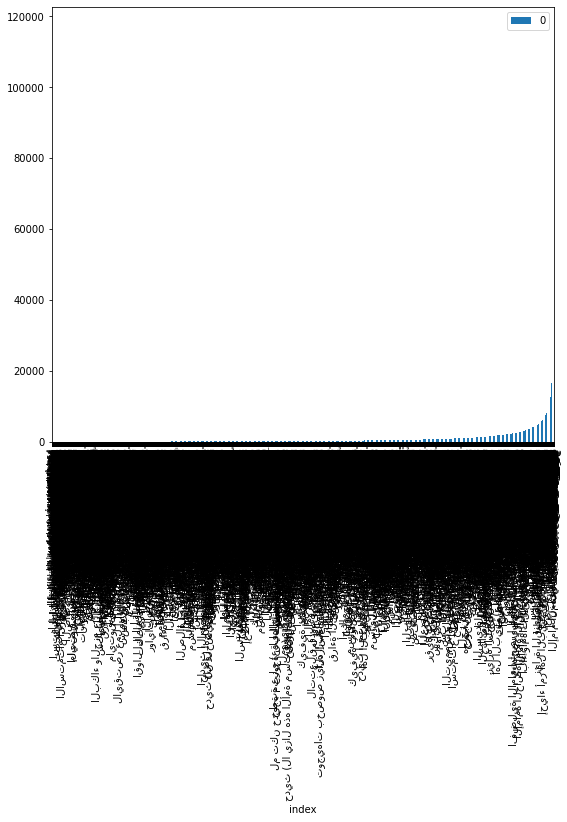

In [ ]:
import matplotlib.pyplot as mp
rslt_df.plot(x="index", y=0, kind="bar", figsize=(9, 8))
mp.show()

In [ ]:
print(len(rslt_df))

10933


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/freq.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  rslt_df.to_csv(f)

Mounted at /content/drive


In [ ]:
set_of_tags=list(set(flat_list))

In [ ]:
print(len(set_of_tags))

10933


In [ ]:
print(list_of_tags[1])

['المعاد']


In [ ]:
a=[['sf'],['hk','jhk'],[],['hk','ft'],[]]
print(type(a))

<class 'list'>


In [ ]:
flat_list = [item for sublist in a for item in sublist]

print(flat_list)

['sf', 'hk', 'jhk', 'hk', 'ft']


In [ ]:
pip install fitter

     |████████████████████████████████| 47 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=5dcda61a04256fafeb9cf0029cf5c699d795d76661e53ddffff65d5fc2bcc709
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=462064daf85dfe50ef55373500c98c100811ba9202014bc9e535716b51af16d0
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

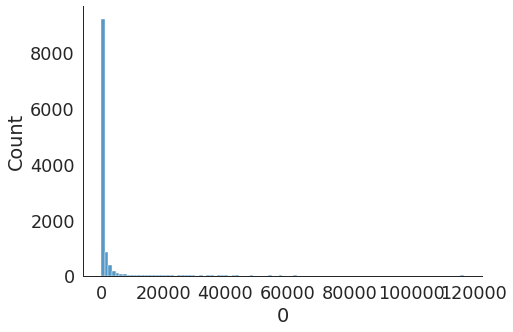

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=rslt_df, x=0, kind="hist", bins = 100, aspect = 1.5)

In [ ]:
height = rslt_df[0].values

,sumsquare_error,aic,bic,kl_div
beta,7.533456e-08,1.499498e+04,-280950.389904,inf
burr,1.671664e-07,3.223690e+03,-272236.236843,inf
lognorm,1.680030e-07,3.371369e+03,-272190.955633,inf
norm,3.507527e-07,5.709733e+04,-264152.477304,inf
gamma,5.215879e-07,2.750191e+06,-259805.003476,0.175085


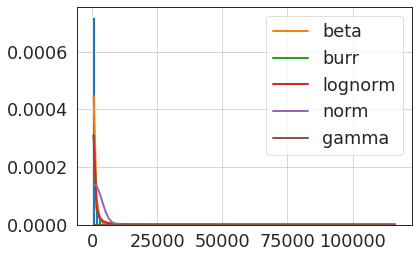

In [ ]:
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.5598070649251141,
  'b': 279.60974323611106,
  'loc': 0.9999999999999998,
  'scale': 289256.9506065685}}

In [ ]:
print(len(new_df))

4412910
